<a href="https://colab.research.google.com/github/Raaghul32/TensorFlow/blob/master/Rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
stock_train= df.iloc[:,1:2].values
stock_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_stock=sc.fit_transform(stock_train)

In [6]:
scaled_stock

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
scaled_stock.shape

(1258, 1)

In [0]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_stock[i-60:i,0])
  y_train.append(scaled_stock[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)  

In [10]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [0]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [0]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
rnn =Sequential()

In [0]:
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn.add(Dropout(0.2))


In [0]:
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))


In [0]:
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))

In [0]:
rnn.add(LSTM(units=50,return_sequences=False))
rnn.add(Dropout(0.2))

In [0]:
rnn.add(Dense(units=1))

In [0]:
rnn.compile(optimizer='adam',loss='mean_squared_error')

In [41]:
rnn.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0414
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [0]:
df1= pd.read_csv('Google_Stock_Price_Test.csv')


In [0]:
real=df1.iloc[:,1:2].values

In [45]:
real

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [0]:
total = pd.concat((df['Open'],df1['Open']),axis=0)
inputs=total[len(total)-len(df1)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [0]:
x_test=[]

for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
  
x_test=np.array(x_test)  

In [0]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
result=rnn.predict(x_test)
result=sc.inverse_transform(result)

In [53]:
result

array([[786.6597 ],
       [784.2806 ],
       [783.7638 ],
       [784.5077 ],
       [787.1608 ],
       [792.26135],
       [797.758  ],
       [801.15   ],
       [802.5064 ],
       [802.579  ],
       [802.0845 ],
       [801.3981 ],
       [800.82367],
       [800.92865],
       [801.6471 ],
       [805.25305],
       [811.33936],
       [818.63776],
       [823.9243 ],
       [822.7035 ]], dtype=float32)

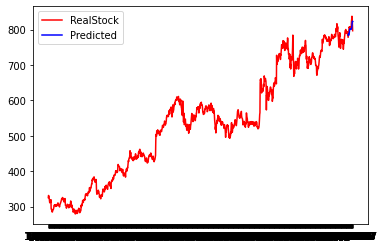

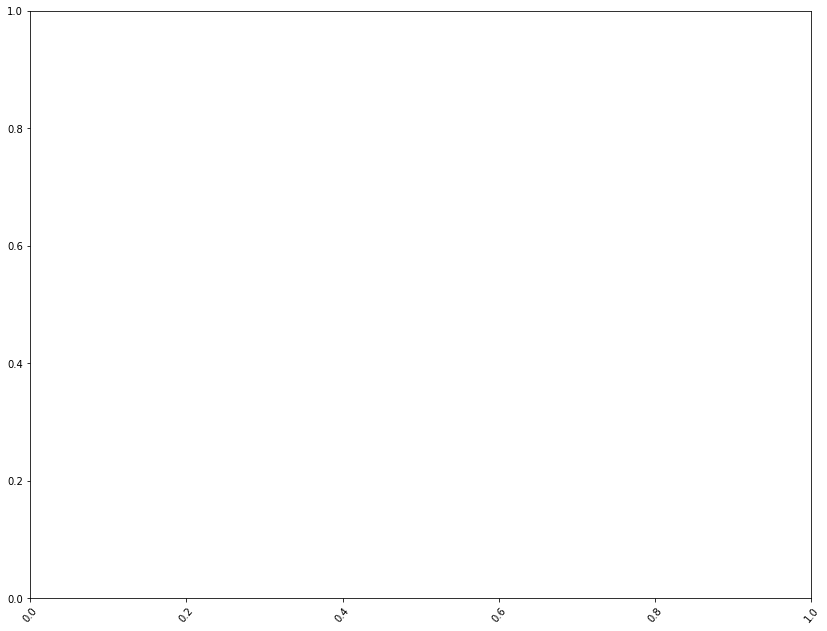

In [65]:
plt.plot(df['Date'],df['Open'],color='red')
plt.plot(df1['Date'],real,color='red',label='RealStock')
plt.plot(df1['Date'],result,color='blue',label='Predicted')
plt.legend()
plt.figure(figsize=(14,12))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=50)
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real, result))

In [64]:
rmse

13.754588642278133